In [1]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro

import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import covid
import covid.util as util
import covid.models.SEIRD_variable_detection
import covid.models.SEIRD_bridge
import covid.models.SEIRD_incident

# Run Inference

In [8]:
#data = util.load_state_data()
data = util.load_county_data()

start = '2020-03-04'
end = None
model_type = covid.models.SEIRD_incident.SEIRD

#places = ['PR']
places = ['NC-Hertford']

for place in places:
    util.run_place(data,
                   place,
                   start=start,
                   end=end,
                   model_type=model_type,
                   rw_scale=1e-1,
                   resample_high=80,
                   resample_low=0,
                   num_warmup=1000,
                   num_samples=1000)

Running NC-Hertford (start=2020-03-04, end=None)
 * running MCMC


sample: 100%|██████████| 2000/2000 [1:31:20<00:00,  2.74s/it, 511 steps of size 2.12e-02. acc. prob=0.93]     



                            mean       std    median      5.0%     95.0%     n_eff     r_hat
                    D0      0.98      1.26      0.59      0.00      2.31   1108.51      1.00
                    E0      5.05      5.73      3.15      0.00     11.71    387.00      1.00
                    H0      0.89      0.83      0.66      0.00      1.94   1138.46      1.00
                    I0      4.67      6.50      2.45      0.00     11.65    260.06      1.00
                 beta0      0.52      0.21      0.49      0.22      0.81     73.83      1.03
  confirmed_dispersion      0.53      0.12      0.52      0.35      0.73   1316.40      1.00
      death_dispersion      0.40      0.14      0.40      0.18      0.63    656.73      1.00
            death_prob      0.01      0.01      0.01      0.00      0.02    155.34      1.00
            death_rate      0.09      0.03      0.09      0.04      0.13   1524.37      1.00
           det_prob[0]      0.26      0.06      0.25      0.15      0

 * collecting in-sample predictive samples
 * collecting forecast samples


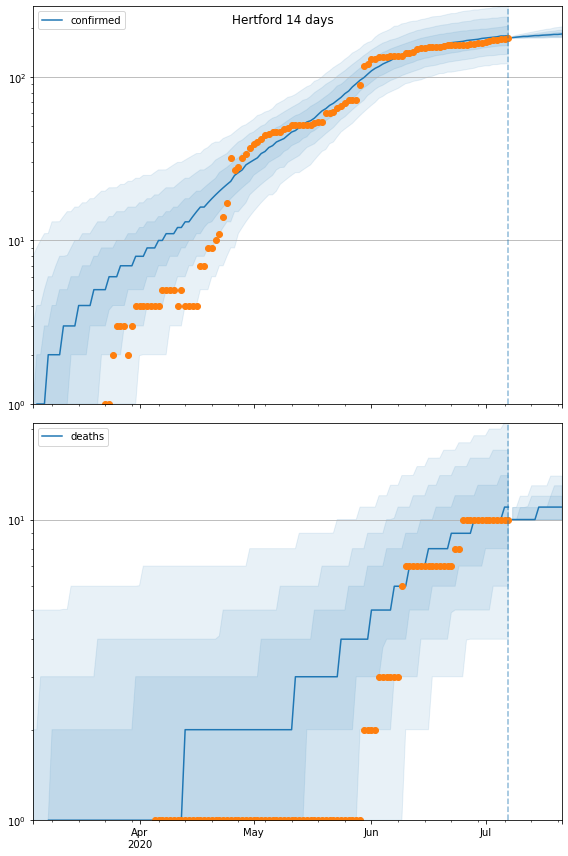

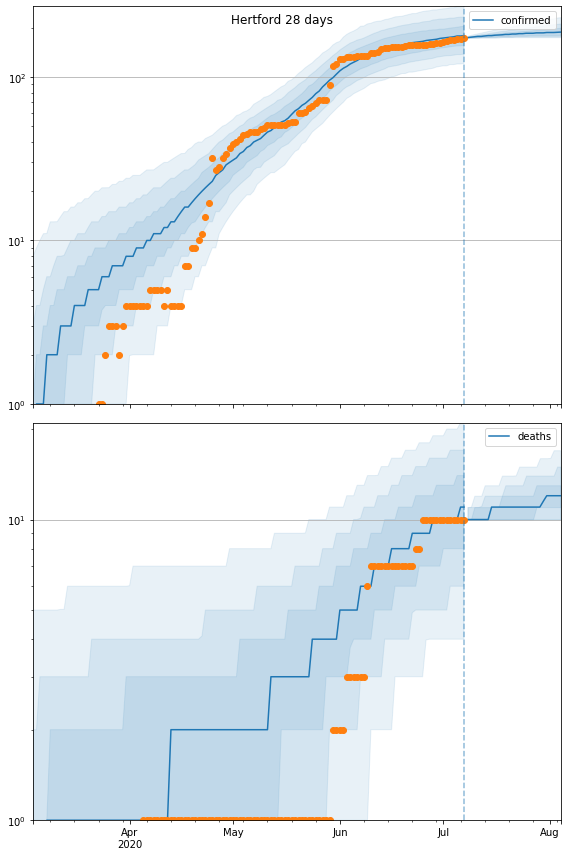

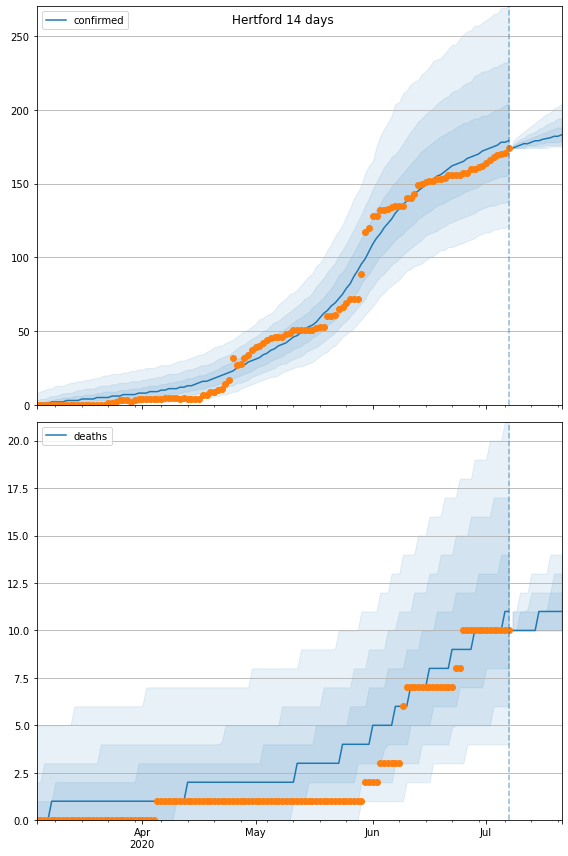

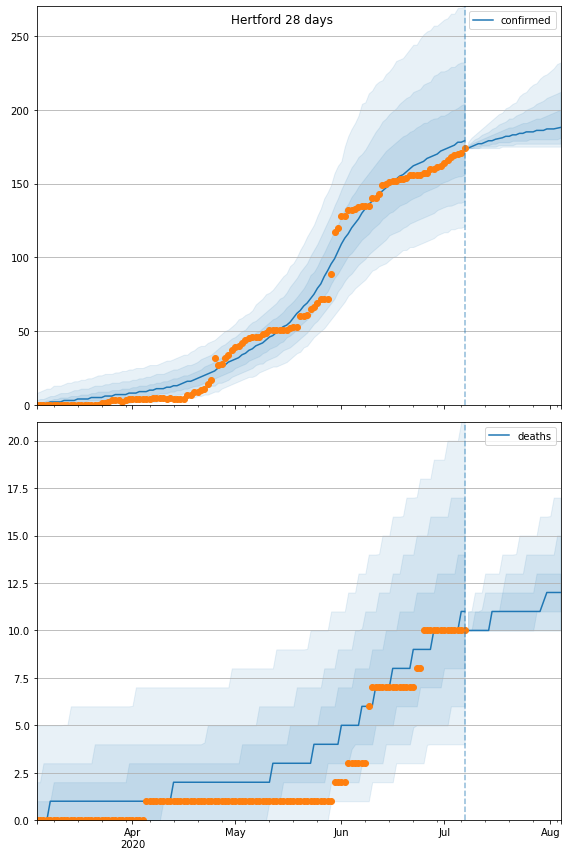

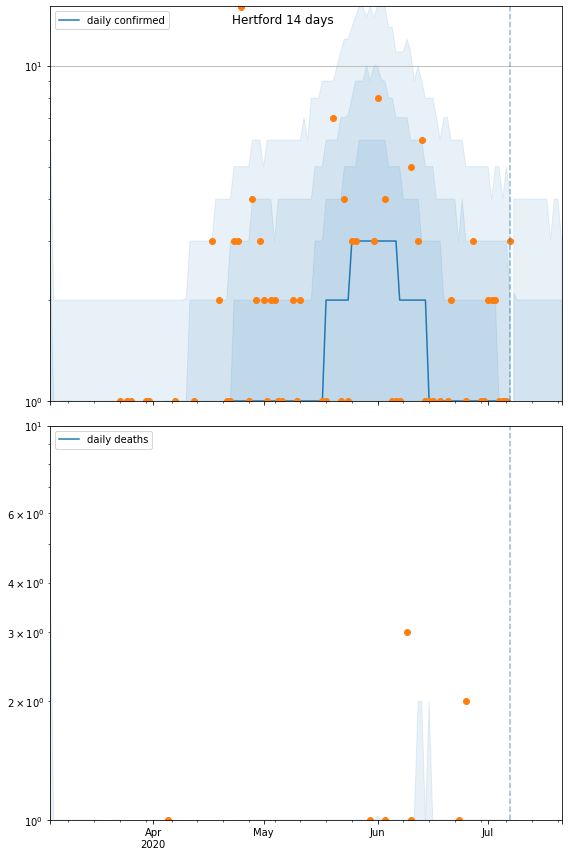

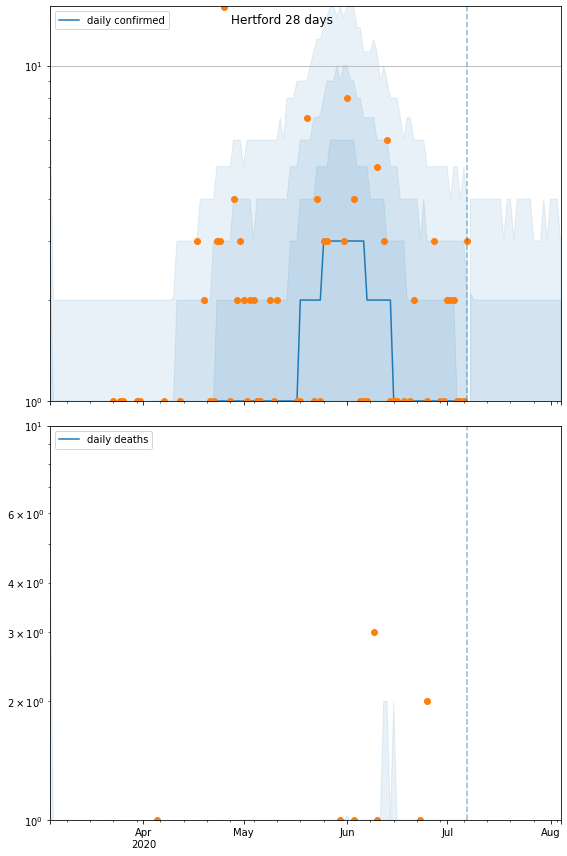

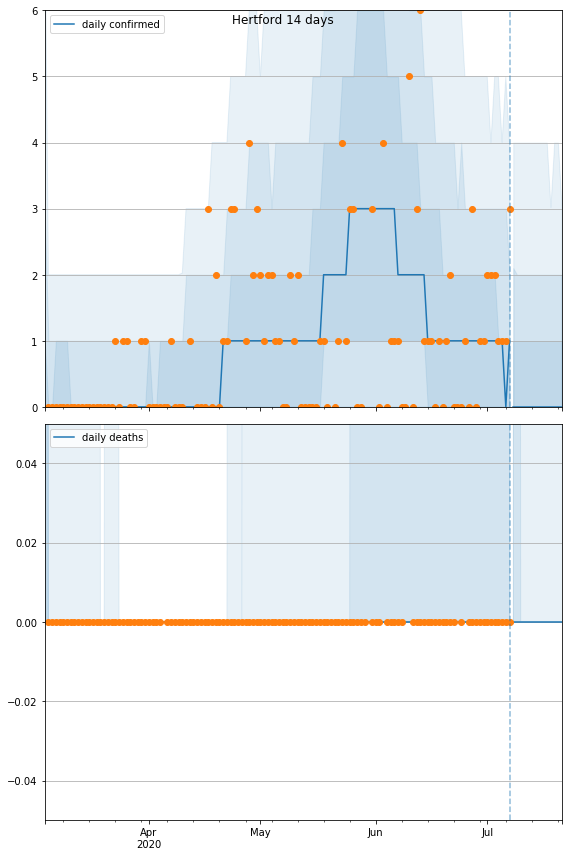

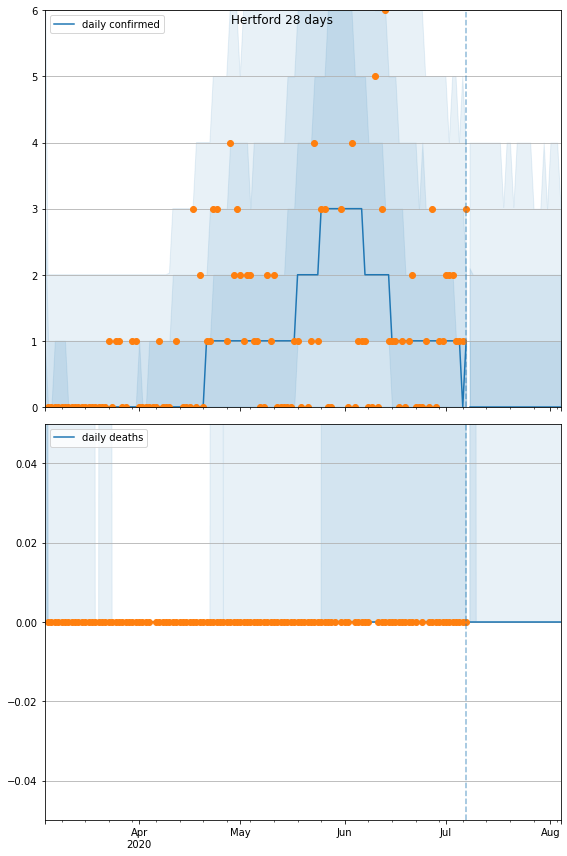

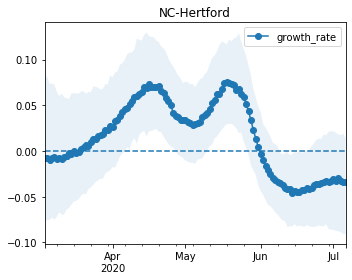

In [30]:
#data = util.load_state_data()
data = util.load_county_data()

start = '2020-03-04'
end=None
#places = ['PR']
places = ['NC-Hertford']

save = True

# Inspect and Save Results 
for place in places:
    util.gen_forecasts(data, 
                       place,
                       model_type=model_type,
                       start=start,
                       end=end,
                       save=save)